<a href="https://colab.research.google.com/github/ucfilho/Raianars_paper_one_revisited/blob/main/FRANK/d30_Fraank_Schwefel_221_CR_maio_14_2021_correct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Noisy_Quartic
# In the paper Ngen=3000
# JADE: Adaptive Differential Evolution with Optional External Archive

In [2]:
!git clone https://github.com/ucfilho/Raianars_July_2020 #clonar do Github
%cd Raianars_July_2020

Cloning into 'Raianars_July_2020'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 172 (delta 24), reused 0 (delta 0), pack-reused 123
Receiving objects: 100% (172/172), 390.34 KiB | 13.46 MiB/s, done.
Resolving deltas: 100% (86/86), done.
/content/Raianars_July_2020


In [3]:
import Go2Ann
import de_soma_Insight
import de_bounds_matriz
import Function
import Go2MinMax
from AvaliaX import AvaliaX
from GeraIndices import GeraIndices

############################### DADOS DE ENTRADA 
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=2000 #10 # PONTOS quantas vezes vai alteral NPAR 

mut=0.5
crossp=0.5
Fi=mut;CRi=crossp;# para impressão

############################### Função
dim=10

#fchoice='Rastrigin' #fchoice='Michalewicz' #fchoice='Schwefel'
fchoice='Schwefel_221'
Fun=Function.Schwefel_221

MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS


In [4]:
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

In [5]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

Cloning into 'ANN_read_matrix'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.
/content/Raianars_July_2020/ANN_read_matrix


In [6]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [7]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [8]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [9]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [10]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [11]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [12]:
##################################### 

#TOTAL=7*dim*its*ITE
TOTAL=10*dim*its*ITE
#TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO

p=int(TOTAL/its/ITE)
#p=int(p/2) 
NPAR=p

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
for i in range(rodadas):
  SOMA=0
  pop = np.random.rand(NPAR, dimensions)
  diff=np.zeros(PAR)
  for ii in range(PAR):
    diff[ii] = MAX[ii]-MIN[ii]
  X = MIN + pop * diff
    
  PONTOS=ITE # DIVISOES DA POPULACAO
 
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  bounds=[(p, p)] * PONTOS




In [13]:
#NPAR=int(NPAR/2)
start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for i in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    SOMAf=0
    start_ite = time.time()
    delta_time=(start_ite-start_time)/60
    
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)
    for ii in range(PAR):
      diff[ii] = MAX[ii]-MIN[ii]
    X = MIN + pop * diff
    Xf = MIN + pop * diff
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind) for ind in X])

    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X,Fitness)
    nrow,ncol=X.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo
  
    MAT_INDo=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1

    
    for k in range(ITE):
      X,BEST,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR,its,Fun,X,SOMA,TOTAL)
      #Xf,BESTf,FOBESTf,XYf,BEST_XYf,SOMAf= de_soma_Insight.de(MAX,MIN, Fi, CRi, NPAR,its,Fun,Xf,SOMAf,TOTAL)

      
      MAT_IND=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]

      Fitness = np.asarray([Fun(ind) for ind in X])
      #Fitnessf = np.asarray([Fun(ind) for ind in Xf])
      Maior=np.argmax(Fitness)
      #Maiorf=np.argmax(Fitnessf)
      Menor=np.argmin(Fitness)
      #Menorf=np.argmin(Fitnessf)

      #X[Maior,:]=np.copy(Xf[Menorf,:])
      #Xf[Maiorf,:]=np.copy(X[Menor,:])
      
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    print('ite=',i,'total=50','time=',delta_time,"Funcao=",FOBEST)
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

ite= 0 total=50 time= 1.0327498118082683e-05 Funcao= 1.1981251797176875e-07
ite= 1 total=50 time= 1.0794898907343546 Funcao= 9.672080434868745e-08
ite= 2 total=50 time= 2.1478121797243754 Funcao= 1.195005991678104e-07
ite= 3 total=50 time= 3.2189429720242817 Funcao= 3.993571468213894e-08
ite= 4 total=50 time= 4.2938511570294695 Funcao= 3.699907242971628e-08
ite= 5 total=50 time= 5.352771770954132 Funcao= 1.0043418168617099e-08
ite= 6 total=50 time= 6.412500961621602 Funcao= 5.960955941277216e-08
ite= 7 total=50 time= 7.483145022392273 Funcao= 1.2938340532630714e-07
ite= 8 total=50 time= 8.55840862194697 Funcao= 5.951035253327981e-12
ite= 9 total=50 time= 9.620355133215586 Funcao= 2.0757615152660533e-07
ite= 10 total=50 time= 10.697415081659953 Funcao= 4.779032204518721e-08
ite= 11 total=50 time= 11.767626961072287 Funcao= 9.745242207757068e-08
ite= 12 total=50 time= 12.837887871265412 Funcao= 3.1742934385720163e-08
ite= 13 total=50 time= 13.894396976629894 Funcao= 6.048369100522102e-08

In [14]:
# print(TOTAL)

In [15]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [16]:
pd.set_option('display.max_columns', 30)  
print(df)

      DIVERSIDADE (DI)   DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X     NP  \
0         1.760563e+02  9.829725e-01    0.0005         0.0      0.0  100.0   
1         1.732152e+02  9.671101e-01    0.0010         0.0      0.0  100.0   
2         1.720567e+02  9.606416e-01    0.0015         0.0      0.0  100.0   
3         1.707886e+02  9.535616e-01    0.0020         0.0      0.0  100.0   
4         1.684850e+02  9.407000e-01    0.0025         0.0      0.0  100.0   
...                ...           ...       ...         ...      ...    ...   
1995      2.368856e-11  1.322600e-13    0.9980         0.0      0.0  100.0   
1996      2.357593e-11  1.316312e-13    0.9985         0.0      0.0  100.0   
1997      2.333273e-11  1.302733e-13    0.9990         0.0      0.0  100.0   
1998      2.318270e-11  1.294357e-13    0.9995         0.0      0.0  100.0   
1999      2.243218e-11  1.252452e-13    1.0000         0.0      0.0  100.0   

            Fo       CRo          fmin          fmax  AD_fmin  

Text(0, 0.5, 'CR')

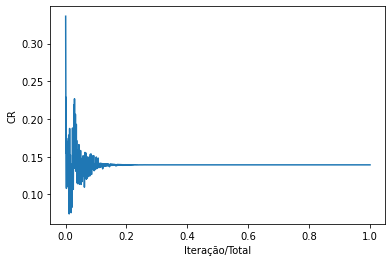

In [17]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

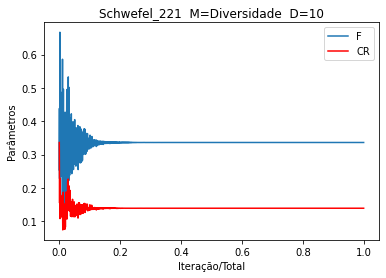

In [18]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'Schwefel_221_Diversidade_D=10')

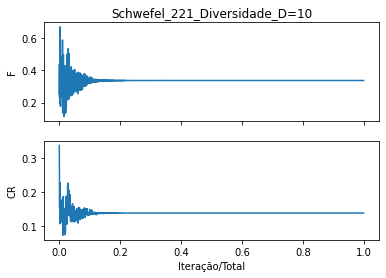

In [19]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [20]:
nome='_ANN_Div3x4_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('DE_POP_VAR_F_CR','TOTAL=',TOTAL,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1])
print('MIN __:',MINFO)
print('MAX__: ',MAXFO)
print('STD __:',STD)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

DE_POP_VAR_F_CR TOTAL= 200000 Iterações= 2000 Dim= 10 Min/Max= -100 / 100 _ Schwefel_221
_ANN_Div3x4_Fo-0.5_CRo-0.5_D-10_Interv-2000 

MÉDIA:  7.346394700891466e-08
MIN __: 4.905751393293987e-12
MAX__:  2.0757615152660533e-07
STD __: 5.0422991964491265e-08
Tempo Médio= 64.183 segundos ---
50 Rodadas

BEST:  [ 2.26953023e-12 -4.27963753e-12  2.55233434e-12 -3.76734195e-12
 -1.80413734e-12 -2.82443189e-12  1.57904544e-14  9.62983704e-14
 -3.73329620e-12  4.90575139e-12  4.90575139e-12]
